Demonstrates the functionality of this using existing tile datasets.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tile_stitcher import get_raster_from_tiles
from tile_stitcher.stitcher import DATASET_SHORTNAMES
from rasterio.plot import show
from matplotlib.colors import ListedColormap
import numpy as np
from tile_stitcher.stitcher import HANSEN_MOSAIC_YEARS

In [3]:
DATASET_SHORTNAMES

['peckel_water_occ_2021',
 'esa_world_cover_2020',
 'esa_world_cover_2021',
 'hansen_annual_mosaic']

# ESA 2021 Worldcover

In [4]:
%%time

bounds = [-120.55, 34.85, -120.25, 35.15]

X, p = get_raster_from_tiles(bounds, tile_shortname='esa_world_cover_2021')
X.shape

CPU times: user 470 ms, sys: 92.4 ms, total: 563 ms
Wall time: 8.19 s


(1, 3600, 3600)

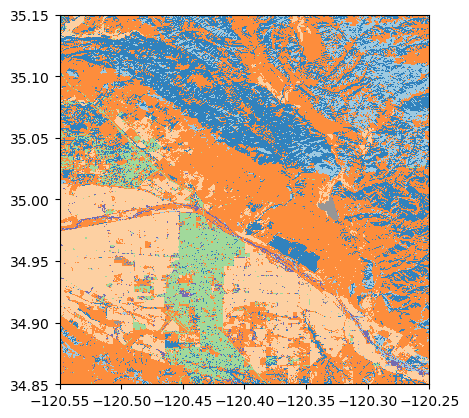

<Axes: >

In [5]:
show(X, transform=p['transform'], cmap='tab20c', interpolation='none')

In [6]:
import rasterio

with rasterio.open('esa_worlf_cover_2021_subset.tif', 'w', **p) as ds:
   ds.write(X)

# Hansen Annual Mosaic

In [7]:
HANSEN_MOSAIC_YEARS

[2000, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [8]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2000, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=HANSEN_MOSAIC_YEARS[0])
X_2000.shape

CPU times: user 151 ms, sys: 116 ms, total: 268 ms
Wall time: 3.28 s


(4, 400, 400)

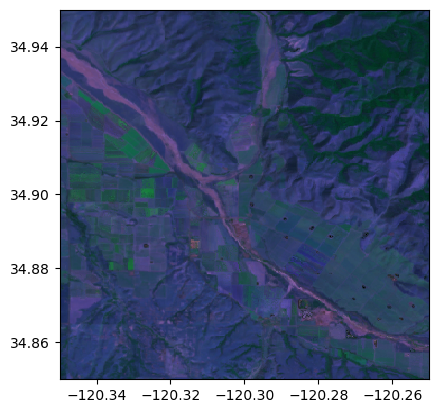

<Axes: >

In [9]:
show(X_2000[:3,...], transform=p['transform'], interpolation='none')

In [10]:
%%time

bounds = [-120.35, 34.85, -120.25, 34.95]

X_2020, p = get_raster_from_tiles(bounds, 
                                  tile_shortname='hansen_annual_mosaic', 
                                  year=2020)
X_2020.shape

CPU times: user 115 ms, sys: 60.1 ms, total: 175 ms
Wall time: 2.38 s


(4, 400, 400)

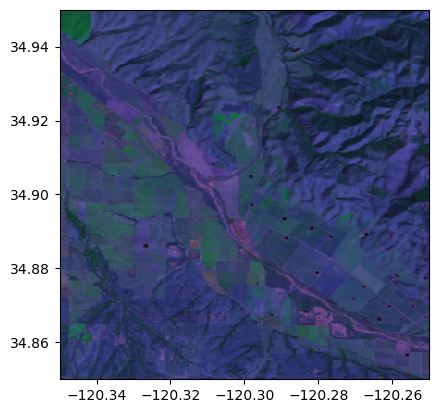

<Axes: >

In [11]:
show(X_2020[:3,...], transform=p['transform'], interpolation='none')

# Pekel

In [12]:
%%time

bounds = [-120.8, 34.4, -120.5, 35]

X_pekel, p = get_raster_from_tiles(bounds, 
                                   tile_shortname='peckel_water_occ_2021')
X_pekel.shape

CPU times: user 110 ms, sys: 38.7 ms, total: 149 ms
Wall time: 2.51 s


(1, 2400, 1200)

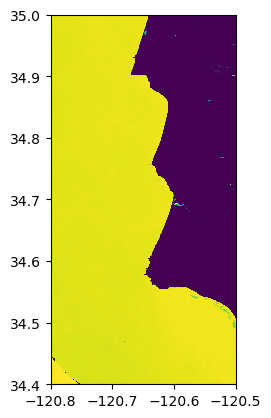

<Axes: >

In [13]:
show(X_pekel, transform=p['transform'], interpolation='none', vmin=0, vmax=100)